<a href="https://colab.research.google.com/github/novoic/ml-challenge/blob/master/text_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://novoic.com"><img src="https://novoic.com/wp-content/uploads/2019/10/logo_320px.png" alt="Novoic logo" width="160"/></a>

# Novoic ML challenge – text data

## Introduction
Welcome to the Novoic ML challenge!

This is an open-ended ML challenge to help us identify exceptional researchers and engineers. The guidance below describes an open-source dataset that you can use to demonstrate your research skills, creativity, coding ability, scientific communication or anything else you think is important to the role.

Before starting the challenge, go ahead and read our CEO's [Medium post](https://medium.com/@emil_45669/the-doctor-is-ready-to-see-you-tube-videos-716b12367feb) on what we're looking for in our Research Scientists, Research Engineers and ML Interns. We recommend you spend around three hours on this (more or less if you wish), which you do not have to do in one go. Please make use of any resources you like.

This is the text version of the challenge. Also available are audio and image versions. You can access all three from [this GitHub repo](https://github.com/novoic/ml-challenge).

Best of luck – we're looking forward to seeing what you can do!

## Prepare the data
Copy the dataset to a local directory – this should take a few seconds.

In [1]:
!mkdir -p data
!gsutil -m cp -r gs://novoic-ml-challenge-text-data/* ./data

Copying gs://novoic-ml-challenge-text-data/LICENSE...
Copying gs://novoic-ml-challenge-text-data/README.md...
Copying gs://novoic-ml-challenge-text-data/data.txt...
/ [3/3 files][468.7 KiB/468.7 KiB] 100% Done                                    
Operation completed over 3 objects/468.7 KiB.                                    


## Data description

The data comprises 5,574 SMS messages. Each message is labelled as either 'ham' (legitimate) or spam.

Each line in `data.txt` corresponds to one message. The first word is the data label (either `ham` or `spam`), followed by a tab (`\t`) character and then the message.

In [0]:
with open('data/data.txt', 'r') as f:
    msgs = f.read().splitlines()

In [3]:
print(msgs[10])
print(msgs[11])

ham	I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
spam	SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info



For more information about the dataset, see its `README.md`.

Directory structure:
```
data/
├── data.txt
├── LICENSE
└── README.md
```






## The challenge
This is an open-ended challenge and we want to witness your creativity. Some suggestions:
- Data exploration/visualization
- Binary classification
- Unsupervised clustering
- Model explainability

You're welcome to explore one or more of these topics, or do something entirely different.

Create, iterate on, and validate your work in this notebook, using any packages of your choosing.

**You can access a GPU via `Runtime -> Change runtime type` in the toolbar.**

## Submission instructions
Once you're done, send this `.ipynb` notebook (or a link to it hosted on Google Drive/GitHub with appropriate permissions) to talent@novoic.com, ensuring that outputs from cells (text, plots etc) are preserved.

If you haven't applied already, make sure you submit an application first through our [job board](https://novoic.com/careers/).

## Your submission
The below sets up TensorFlow as an example but feel free to use any framework you like.

In [0]:
# The default TensorFlow version on Colab is 1.x. Uncomment the below to use TensorFlow 2.x instead.
# %tensorflow_version 2.x

In [5]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, BatchNormalization, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Take the wheel!

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('data/data.txt', sep="\t", header=None)

In [0]:
data.columns=['labels','text']

In [9]:
data['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [0]:
data=data[['text','labels']]

In [11]:
data['text'].values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [12]:
data.head()

,text,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [0]:
## Checking min, max and avergae number of words in each data point

In [19]:
x1=list(data['text'].apply(lambda x: len(str(x).split(" "))))
max_value = max(x1)
min_value = min(x1)
avg_value = sum(x1)/len(x1)
print('Max: ',max_value,'\nMin: ',min_value,'\nAvg: ',avg_value)

Max:  171 
Min:  1 
Avg:  15.709440057430006


In [31]:
list(data['text'][0:10])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [0]:
##### Data has lot of slangs. Trying to correct spellings using Textblob library

In [0]:
from textblob import TextBlob
clean_data=data['text'][:10].apply(lambda x: str(TextBlob(x).correct()))

In [26]:
list(clean_data)

['To until during point, crazy.. Available only in boris n great world la e buffets... Line there got more wat...',
 'K war... Joking if u on...',
 "Free entry in 2 a wily come to win of Up final this must May 2005. Next of to 87121 to receive entry question(st txt rate)T&C's apply 08452810075over18's",
 'U dun say so early for... U c already then say...',
 "Ah I don't think he goes to us, he lives around here though",
 "FreeMsg Key there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? B ok! x st cogs to send, £1.50 to rev",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "Is per your request 'Selle Selle (You Minnaminunginte Nurungu Bettah)' has been set as your callertune for all Callers. Dress *9 to copy your friends Callertune",
 'WINNER!! Is a valued network customer you have been selected to received £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11

In [0]:
## Seems like textblob not much usefull. 
## We might loose some important information as the avergae size of the text is already very less (Avergae: 15 words) as checked above :(

In [0]:
## Normalising and preprocessing textual data

In [0]:
def normalize(s):
    s = s.lower()
    # Isolate punctuation
    s = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' \1 ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    s = s.replace('nbsp', '')
    s = re.sub(" \d+", " ", s)
    return s

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
train_norm_text=[]
for line in data['text'].values:
    line=str(line)
    line = normalize(line)
    line = line.lower()
    line_by_words = re.findall(r'(?:\w+)', line, flags = re.UNICODE) # remove punctuation ans split
    new_line=[]
    for word in line_by_words:
        if word not in stop:
            new_line.append(word)
    train_norm_text.append(" ".join(new_line))

In [0]:
train_norm_text[40:60]

['pls go ahead watts wanted sure great weekend abiola',
 'forget tell want need crave love sweet arabian steed mmmmmm yummy',
 '07732584351 rodger burns msg tried call reply sms free nokia mobile free camcorder please call delivery tomorrow',
 'seeing',
 'great hope like man well endowed lt gt inches',
 'calls messages missed calls',
 'get hep b immunisation nigeria',
 'fair enough anything going',
 'yeah hopefully tyler could maybe ask around bit',
 'u know stubborn even want go hospital kept telling mark weak sucker hospitals weak suckers',
 'thinked first time saw class',
 'gram usually runs like lt gt half eighth smarter though gets almost whole second gram lt gt',
 'k fyi x ride early tomorrow morning crashing place tonight',
 'wow never realized embarassed accomodations thought liked since best could always seemed happy cave sorry give sorry offered sorry room embarassing',
 'sms ac sptv new jersey devils detroit red wings play ice hockey correct incorrect end reply end sptv',
 '

In [0]:
data['text'].values[40:60]

array(['Pls go ahead with watts. I just wanted to be sure. Do have a great weekend. Abiola',
       'Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you my sweet Arabian steed ... Mmmmmm ... Yummy',
       '07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow',
       'WHO ARE YOU SEEING?',
       'Great! I hope you like your man well endowed. I am  &lt;#&gt;  inches...',
       'No calls..messages..missed calls',
       "Didn't you get hep b immunisation in nigeria.",
       'Fair enough, anything going on?',
       "Yeah hopefully, if tyler can't do it I could maybe ask around a bit",
       "U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers.",
       'What you thinked about me. First time you saw me in class.',
       'A g

In [0]:
data['text']=train_norm_text

In [0]:
data.head()

,text,labels
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think goes usf lives around though,ham


In [0]:
data.labels = data.labels.replace({"spam": 1, "ham": 0})

In [0]:
data.head()

,text,labels
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
text      5572 non-null object
labels    5572 non-null int64
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [0]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(data, test_size=0.1)

In [0]:
print(train_df['labels'].value_counts())

0    4351
1     663
Name: labels, dtype: int64


In [0]:
print(eval_df['labels'].value_counts())

0    474
1     84
Name: labels, dtype: int64


In [0]:
!pip install simpletransformers

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 501kB 8.6MB/s 
     |████████████████████████████████| 204kB 14.5MB/s 
     |████████████████████████████████| 870kB 13.8MB/s 
     |████████████████████████████████| 1.0MB 19.1MB/s 
     |████████████████████████████████| 3.7MB 26.9MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=8ac1149ac450cdb302f8d5cdf999228529b6d5d13a7348af35eeaa08ea333e4a
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=a142ce1a112dbba6bd875ac8f4e42d135f2cd63a2656127d58e463962befab95
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built seqeval sacremoses


In [0]:
!git clone https://github.com/NVIDIA/apex

Cloning into 'apex'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 5914 (delta 45), reused 40 (delta 23), pack-reused 5835
Receiving objects: 100% (5914/5914), 13.61 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (3837/3837), done.


In [0]:
%cd apex

/content/apex


In [0]:
!pwd

/content/apex


In [0]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-vypzh34k
Created temporary directory: /tmp/pip-req-tracker-getg2ck8
Created requirements tracker '/tmp/pip-req-tracker-getg2ck8'
Created temporary directory: /tmp/pip-install-124l9211
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-ibedi2vm
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-getg2ck8'
    Running setup.py (path:/tmp/pip-req-build-ibedi2vm/setup.py) egg_info for package from file:///content/apex
    Running command python setup.py egg_info
    torch.__version__  =  1.4.0
    running egg_info
    creating /tmp/pip-req-build-ibedi2vm/pip-egg-info/apex.egg-info
    writing /tmp/pip-req-build-ibedi2vm/pip-egg-info/apex.egg-info/PKG-INFO
  

In [0]:
from simpletransformers.classification import ClassificationModel

In [0]:
import apex

In [0]:
## Trying the best available version of bi-directional transformer
model = ClassificationModel('roberta', 'roberta-base')

In [0]:
model.train_model(train_df)

Converting to features started. Cache is not used.


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 0.720056

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 0.256548Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 0.715401

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.364815Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 0.103408Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 0.377840Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 0.166219Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 2048.0
Running loss: 0.001099Training of roberta model complete. Saved to outputs/.


In [0]:
import sklearn
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=sklearn.metrics.accuracy_score)

Converting to features started. Cache is not used.


{'mcc': 0.9286521757956496, 'tp': 75, 'tn': 473, 'fp': 1, 'fn': 9, 'acc': 0.982078853046595, 'eval_loss': 0.09139247355716569}


In [0]:
result

{'acc': 0.982078853046595,
 'eval_loss': 0.09139247355716569,
 'fn': 9,
 'fp': 1,
 'mcc': 0.9286521757956496,
 'tn': 473,
 'tp': 75}

In [0]:
## Accuracy not much usefull because dataset is imbalanced. Lets check the precision recall for each of the 2 classes
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=sklearn.metrics.classification_report)

Converting to features started. Cache is not used.


{'mcc': 0.9286521757956496, 'tp': 75, 'tn': 473, 'fp': 1, 'fn': 9, 'acc': '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       474\n           1       0.99      0.89      0.94        84\n\n    accuracy                           0.98       558\n   macro avg       0.98      0.95      0.96       558\nweighted avg       0.98      0.98      0.98       558\n', 'eval_loss': 0.09139247355716569}


In [0]:
print(result['acc']) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       474
           1       0.99      0.89      0.94        84

    accuracy                           0.98       558
   macro avg       0.98      0.95      0.96       558
weighted avg       0.98      0.98      0.98       558



In [0]:
## It seems like  giving decent results on test set
## Now lets try to predcit from the trained model

In [0]:
predictions, raw_outputs = model.predict(['Some random test text'])

Converting to features started. Cache is not used.


In [0]:
predictions

array([0])

In [0]:
## Now tring my own neural net architecture (LSTM & CNN) using glove embeddings.
## Though I am quite sure that it will not surpasss the contextual learning power of BERT and RoBERTa.

In [0]:
data.head()

,text,labels
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think goes usf lives around though,ham


In [0]:
X=data['text'].values
y = data['labels'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
list(y_test).count(1)

73

In [0]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
!wget https://www.floydhub.com/api/v1/resources/Av2ThePYtAHXMAuSXEBV8X/glove.6B.100d.txt?content=true&rename=glove6b100dtxt

--2020-03-06 00:27:22--  https://www.floydhub.com/api/v1/resources/Av2ThePYtAHXMAuSXEBV8X/glove.6B.100d.txt?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.26.1.30, 104.26.0.30, 2606:4700:20::681a:1e, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.26.1.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove.6B.100d.txt?content=true’

glove.6B.100d.txt?c     [              <=>   ] 331.04M  29.9MB/s    in 11s     

2020-03-06 00:27:33 (29.9 MB/s) - ‘glove.6B.100d.txt?content=true’ saved [347116733]



In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/apex/glove.6B.100d.txt?content=true', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         748600    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 865,977
Trainable params: 117,377
Non-trainable params: 748,600
_________________________________________________________________
None


In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

Train on 4011 samples, validate on 1003 samples
Epoch 1/5
4011/4011 [==============================] - 42s 10ms/step - loss: 0.4229 - acc: 0.8651 - val_loss: 0.4071 - val_acc: 0.8594
Epoch 2/5
4011/4011 [==============================] - 42s 10ms/step - loss: 0.3969 - acc: 0.8671 - val_loss: 0.4099 - val_acc: 0.8594
Epoch 3/5
4011/4011 [==============================] - 42s 10ms/step - loss: 0.3951 - acc: 0.8671 - val_loss: 0.4090 - val_acc: 0.8594
Epoch 4/5
4011/4011 [==============================] - 42s 10ms/step - loss: 0.3938 - acc: 0.8671 - val_loss: 0.4098 - val_acc: 0.8594
Epoch 5/5
4011/4011 [==============================] - 41s 10ms/step - loss: 0.4327 - acc: 0.8499 - val_loss: 0.4078 - val_acc: 0.8594


In [0]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

558/558 [==============================] - 1s 2ms/step
Test Score: 0.39181516311501946
Test Accuracy: 0.8691756270265066


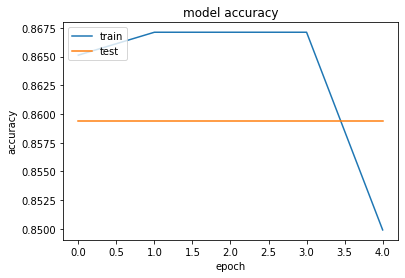

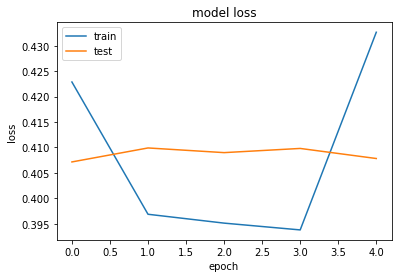

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [0]:
### Document clustering on textual data using Word2vec algo for vectoriasation.

In [0]:
data.head()

,text,labels
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think goes usf lives around though,ham


In [0]:
data = data[data['text'] != ""]

In [0]:
from gensim.models import Word2Vec

In [0]:
sent = list(data['text'].values)

In [0]:
len(sent)

5565

In [0]:
sentences = [s.split() for s in sent]

In [0]:
sentences[0:2]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]

In [0]:
model = Word2Vec(sentences, min_count=1)

In [0]:
model['lar']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.08425236, -0.03530616,  0.06031119, -0.1312181 , -0.06056321,
       -0.06743998, -0.01823891,  0.12322085, -0.03319309, -0.09959697,
       -0.00963893,  0.03100465,  0.11069028,  0.24904935, -0.08887926,
       -0.03517861,  0.02999886,  0.04212738, -0.10292456, -0.07975124,
        0.04535414, -0.11293592, -0.02448842, -0.17689817,  0.14009173,
        0.05066394,  0.03928576, -0.06867744, -0.08835024, -0.03649814,
       -0.03624946, -0.11336922, -0.16642529,  0.02629718,  0.01655509,
       -0.04585595, -0.05980199,  0.02952408, -0.05007722,  0.06566424,
        0.01608217,  0.03499563, -0.13660799, -0.01712394, -0.08936438,
       -0.04427188, -0.22872709,  0.07851815, -0.01952958,  0.0795555 ,
        0.21160327, -0.00335807, -0.08760685, -0.09001532, -0.0680085 ,
       -0.07820908,  0.11947383,  0.04721401,  0.04730167,  0.01833452,
       -0.05767355,  0.06898969, -0.10957853, -0.0802113 ,  0.11553977,
       -0.12498644, -0.08186045, -0.05693591, -0.0452714 ,  0.14

In [0]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [0]:
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:
len(X)

5565

In [0]:
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
from sklearn import cluster
from sklearn import metrics

In [0]:
import nltk
from nltk.cluster import KMeansClusterer, euclidean_distance

In [0]:
kclusterer = KMeansClusterer(2, distance=euclidean_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print(assigned_clusters)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 

In [0]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)

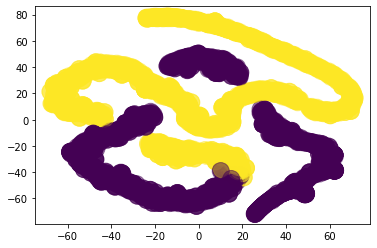

In [0]:
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)

In [0]:
## Plotting word cloud for both of the classes to see what most occuring words

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [0]:
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100            
mpl.rcParams['figure.subplot.bottom']=.1 

In [0]:
## For class "ham"

In [0]:
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40, 
                      random_state=42).generate(str(data[data['labels']=='ham']['text']))

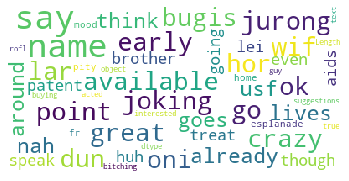

In [0]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
## For class "spam"

In [0]:
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40, 
                      random_state=42).generate(str(data[data['labels']=='spam']['text']))

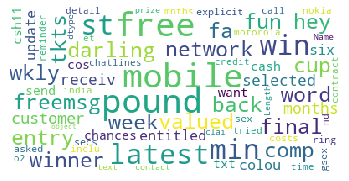

In [0]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
## Thanks to all awesome libraraies for their open sourced code. :)